# Band edge position of different semiconductors in aqueous solution

In [2]:
import numpy as np
from mpl_toolkits.axes_grid.axislines import SubplotZero
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
import operator

from mtfa import Material, Structure

%run -i settings.py

In [32]:
# band edge shift with -59 mV per pH \cite{VandeKrol2012}, p.41
# data from \cite{Li2015, Memming2015} reculculated from the original pH

# electron affinity in eV
Ea = {
    'GaAs': 3.63, # \cite{Memming2015} # 4.07,
    'GaP': 3.39,  # \cite{Memming2015}
    'InAs': 4.65, # \cite{Zhu2012}
    'PbS': 4.5,   # \cite{Zhu2012}
    'PbTe': 4.6,  # \cite{Zhu2012}
    'PbSe': 4.7,  # \cite{Zhu2012}
    'Si': 4.04,   # \cite{Li2015}
    'InN': 5.0,   # \cite{Lindgren2002}
    'GaN': 4.3,   # \cite{Lindgren2002}
    'InSb': 4.59,
    'SiC': 3.1    # \cite{Gratzel2001}
    }

# energy gap at 300K in eV
# ref. ioffe
Eg = {
    'GaAs': 1.424,
    'GaP': 2.26,
    'InAs': 0.354,
    'PbS': 0.41,   # \cite{Zhu2012}
    'PbTe': 0.31,  # \cite{Zhu2012}
    'PbSe': 0.26,  # \cite{Zhu2012}
    'Si': 1.12,
    'InN': 0.7,    # 1.97
    'GaN': 3.28,
    'InSb': 0.17,
    'SiC': 3.0
    }

#materials = ('GaAs', 'InAs', 'Si', 'InN', 'InSb', 'GaN')
materials = ('GaAs', 'Si', 'InN', 'InSb', 'GaN', 'SiC')

In [33]:
# Sort materials by band gap
new_mat = ()
for key, value in sorted(Eg.items(), key=operator.itemgetter(1)):
    if key in materials:
        new_mat += (key,)
materials = new_mat

In [34]:
y = []
error = []

for m in materials:
    y.append(-Ea[m]-Eg[m]/2)
    error.append(Eg[m]/2)

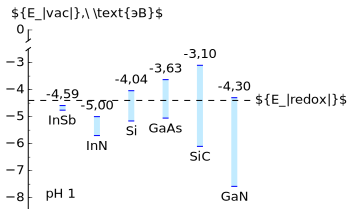

In [35]:
fill = (0.76,0.92,1)
E_redox = -4.4
ratio = 15

#params= {'figure.figsize': [2.5, 3],
#        'svg.fonttype':'none'
#        }
#plt.rcParams.update(params)

f =  plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[1, ratio]) 
ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

x = np.arange(len(y))+0.5
(_, caps, bars )= ax2.errorbar(x, y, yerr=error, fmt='None', 
                           elinewidth=6, capsize=3)
for bar in bars:
    bar.set_color(fill)

for cap in caps:
    cap.set_color('b')
    cap.set_markeredgewidth(1)


ax.set_xlim(-0.5, max(x)+0.5)
ax2.set_xlim(ax.get_xlim())
ax2.plot([-0.5, max(x)+1],[E_redox, E_redox], 'k--')

for direction in ["right", "bottom", "top"]:
        ax.spines[direction].set_visible(False)
        ax2.spines[direction].set_visible(False)
        

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')
ax.xaxis.set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('none')

for i, m in enumerate(materials):
    set_y = -Ea[m] + 0.4
    if locale.localeconv()['decimal_point'] is ',':
        ea_lable = "{0:.2f}".format(-Ea[m]).replace('.', ',')
    else:
        ea_lable = "{0:.2f}".format(-Ea[m])
    ax2.text(x[i], set_y, ea_lable, ha="center", va="center", rotation=0) 
    
for i, m in enumerate(materials):
    set_y =- Ea[m] - Eg[m] - 0.4
    ax2.text(x[i], set_y, m, ha="center", va="center") 

if locale.localeconv()['decimal_point'] is ',':
    ylable = '\${E_|vac|},\ \\text{эВ}$'
else:
    ylable = '\${E_|vac|},\ \\text{eV}$'

ax2.text(max(x)+0.6, E_redox, '\${E_|redox|}$', va="center", ha='left') 
ax.text(ax.get_xlim()[0]-0.5, ax.get_ylim()[0]+ratio*0.05, 
        ylable,
        ha="left", va="center")

ax2.text(0, -8, 'pH 1')
ax2.set_ylim(-8.4, -2.501)
ax.set_ylim(-0.49, 0)
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))


d = .01 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-ratio*d,+ratio*d), **kwargs)      # top-left diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal

f.subplots_adjust(hspace=0.1) 

plt.xticks(x, ())
plt.savefig('IP_ECV_band_edge.svg', transparent=True)
plt.show()